In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%qtconsole

In [3]:
def sigmoid(v):
    return np.tanh(v)
    #return 1/(1+np.exp(-v))

In [4]:
def sigmoid_derivative(v):
    return 1 - sigmoid(v)**2
    #return sigmoid(v)*(1-sigmoid(v))

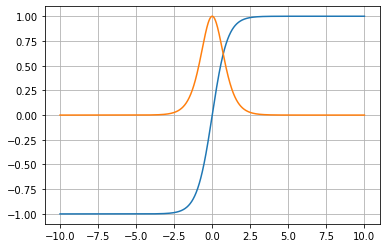

In [5]:
x1 = np.linspace(-10,10,1000)
y1 = [sigmoid(e) for e in x1]
dy1 = [sigmoid_derivative(e) for e in x1]
plt.plot(x1,y1)
plt.plot(x1,dy1)
plt.grid(True)
plt.show()

In [6]:
def mlpclass(y):
    #Retourne les classes de la sortie y 
    if len(y.shape)==1:
        res = np.argmax(y)
    else: 
        res = []
        for i in range(y.shape[1]):
            res.append(np.argmax(y[:,i]))
    return res

In [7]:
def label2target(c,nb_classe):
    #Calcule les vecteurs de sortie désirée en fonction des classes en entrée
    n = len(c)
    res = -np.ones((nb_classe,n))
    for i in range(n):
        res[c[i],i] = 1
    return res

In [8]:
def score(label, pred):
    #Retourne le score de la prédiction
    verification = label == pred
    res = [e for e in verification if e ==True]
    nb = len(res)
    taux = round(len(res)/len(verification),2)
    return {'nb': nb,'taux': taux }

In [9]:
def sqrerror(error):
    #Calcul l'erreur au sein des moindres carrés
    sqrmatrix = [e**2 for e in error]
    res = sum(sum(sqrmatrix))
    return res

In [10]:
class TwoLayersNeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, nb_hidden, nb_out):
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        self.weights1    = (np.random.rand(self.input_train.shape[0],nb_hidden)
                            -np.random.randint(0,2,(self.input_train.shape[0],nb_hidden)))*w_sup        
        self.weights2    = (np.random.rand(nb_hidden,nb_out)
                            -np.random.randint(0,2,(nb_hidden,nb_out)))*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        
    def feedforward(self, train):
        if train == True:
            self.layer1   = np.dot(self.input_train.T, self.weights1)
            self.output1  = sigmoid(self.layer1)
            self.layer2   = np.dot(self.output1, self.weights2)
            self.output2  = sigmoid(self.layer2)
        else:
            self.layer1   = np.dot(self.input_test.T, self.weights1)
            self.output1  = sigmoid(self.layer1)
            self.layer2   = np.dot(self.output1, self.weights2)
            self.output2  = sigmoid(self.layer2)

    def backprop(self, lr):
        self.error = self.output2 - self.y_train
        delta2 = 2*self.error * sigmoid_derivative(self.layer2)
        d_weights2 = lr*np.dot(self.output1.T, delta2)
        delta1 = sigmoid_derivative(self.layer1)*np.dot(delta2,self.weights2.T)
        d_weights1 = lr*np.dot(self.input_train, delta1)
        self.weights1 -= d_weights1
        self.weights2 -= d_weights2
                
    def train(self, it, lr):
        for i in range(it):
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            
    def test(self,train):
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output2.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

In [11]:
Basetrain = np.load('basetrain.npy')
Basetrain = Basetrain/255

Labeltrain = np.load('labeltrain.npy')
Labeltrain = np.array(label2target(Labeltrain,10)).T

Basetest = np.load('basetest.npy')
Basetest = Basetest/255

Labeltest = np.load('labeltest.npy')
Labeltest = np.array(label2target(Labeltest,10)).T

In [12]:
nn_1000 = TwoLayersNeuralNetwork(Basetrain[:,0:1000],Labeltrain[0:1000,:],Basetest,Labeltest, w_sup = 1e-1, nb_hidden=20, nb_out = 10)
it, lr = 1000, 1e-4
nn_1000.train(it,lr)

In [16]:
nn_10_000 = TwoLayersNeuralNetwork(Basetrain,Labeltrain,Basetest,Labeltest, w_sup = 1e-1, nb_hidden=20, nb_out = 10)
it, lr = 1000, 1e-6
nn_10_000.train(it,lr)

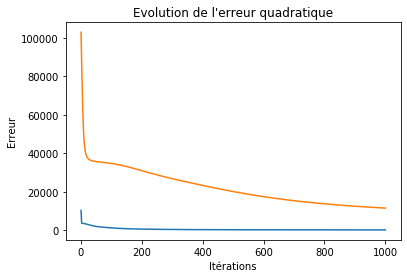

1000 exemples : {'nb': 982, 'taux': 0.98}
10 000 exemples : {'nb': 8705, 'taux': 0.87}


In [17]:
iterations = np.linspace(1,it,it)
plt.plot(iterations,nn_1000.errors, label='1000')
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.plot(iterations,nn_10_000.errors, label='10 000')
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
print('1000 exemples :',nn_1000.test(train = True))
print('10 000 exemples :',nn_10_000.test(train = True))

In [18]:
print('1000 exemples :',nn_1000.test(train = False))
print('10 000 exemples :',nn_10_000.test(train=False))

1000 exemples : {'nb': 1731, 'taux': 0.87}
10 000 exemples : {'nb': 1732, 'taux': 0.87}
